In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


12:15:53 - INFO: Sampling 4 new images....
699it [02:32,  4.59it/s]


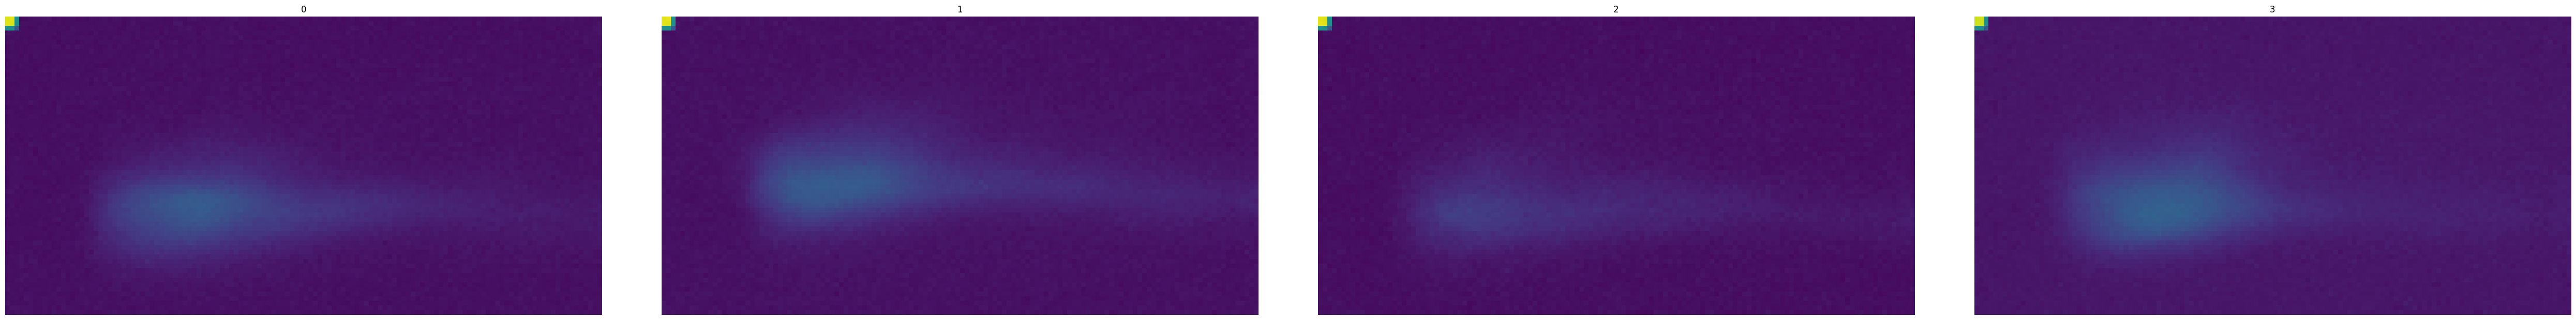

In [5]:
from ddpm_conditional import *
from utils import plot_images, plot_images_from_dir

n = 4
device = "cuda:1"
model = UNet_conditional(img_width=128, img_height=64, feat_num=3, device=device).to(device)
ckpt = torch.load("models/transfer_ema80/ema_ckpt.pt")
# ckpt = torch.load("models/transfer_specific_batchbigger/ema_ckpt.pt")
model.load_state_dict(ckpt)
diffusion = Diffusion(img_width=128, img_height=64, device=device, noise_steps=700)
y = torch.Tensor([26,11.5,10]).to(device).float().unsqueeze(0) # parameter vector
x = diffusion.sample(model, n, y, cfg_scale=3)
plot_images(x)
save_samples(x)

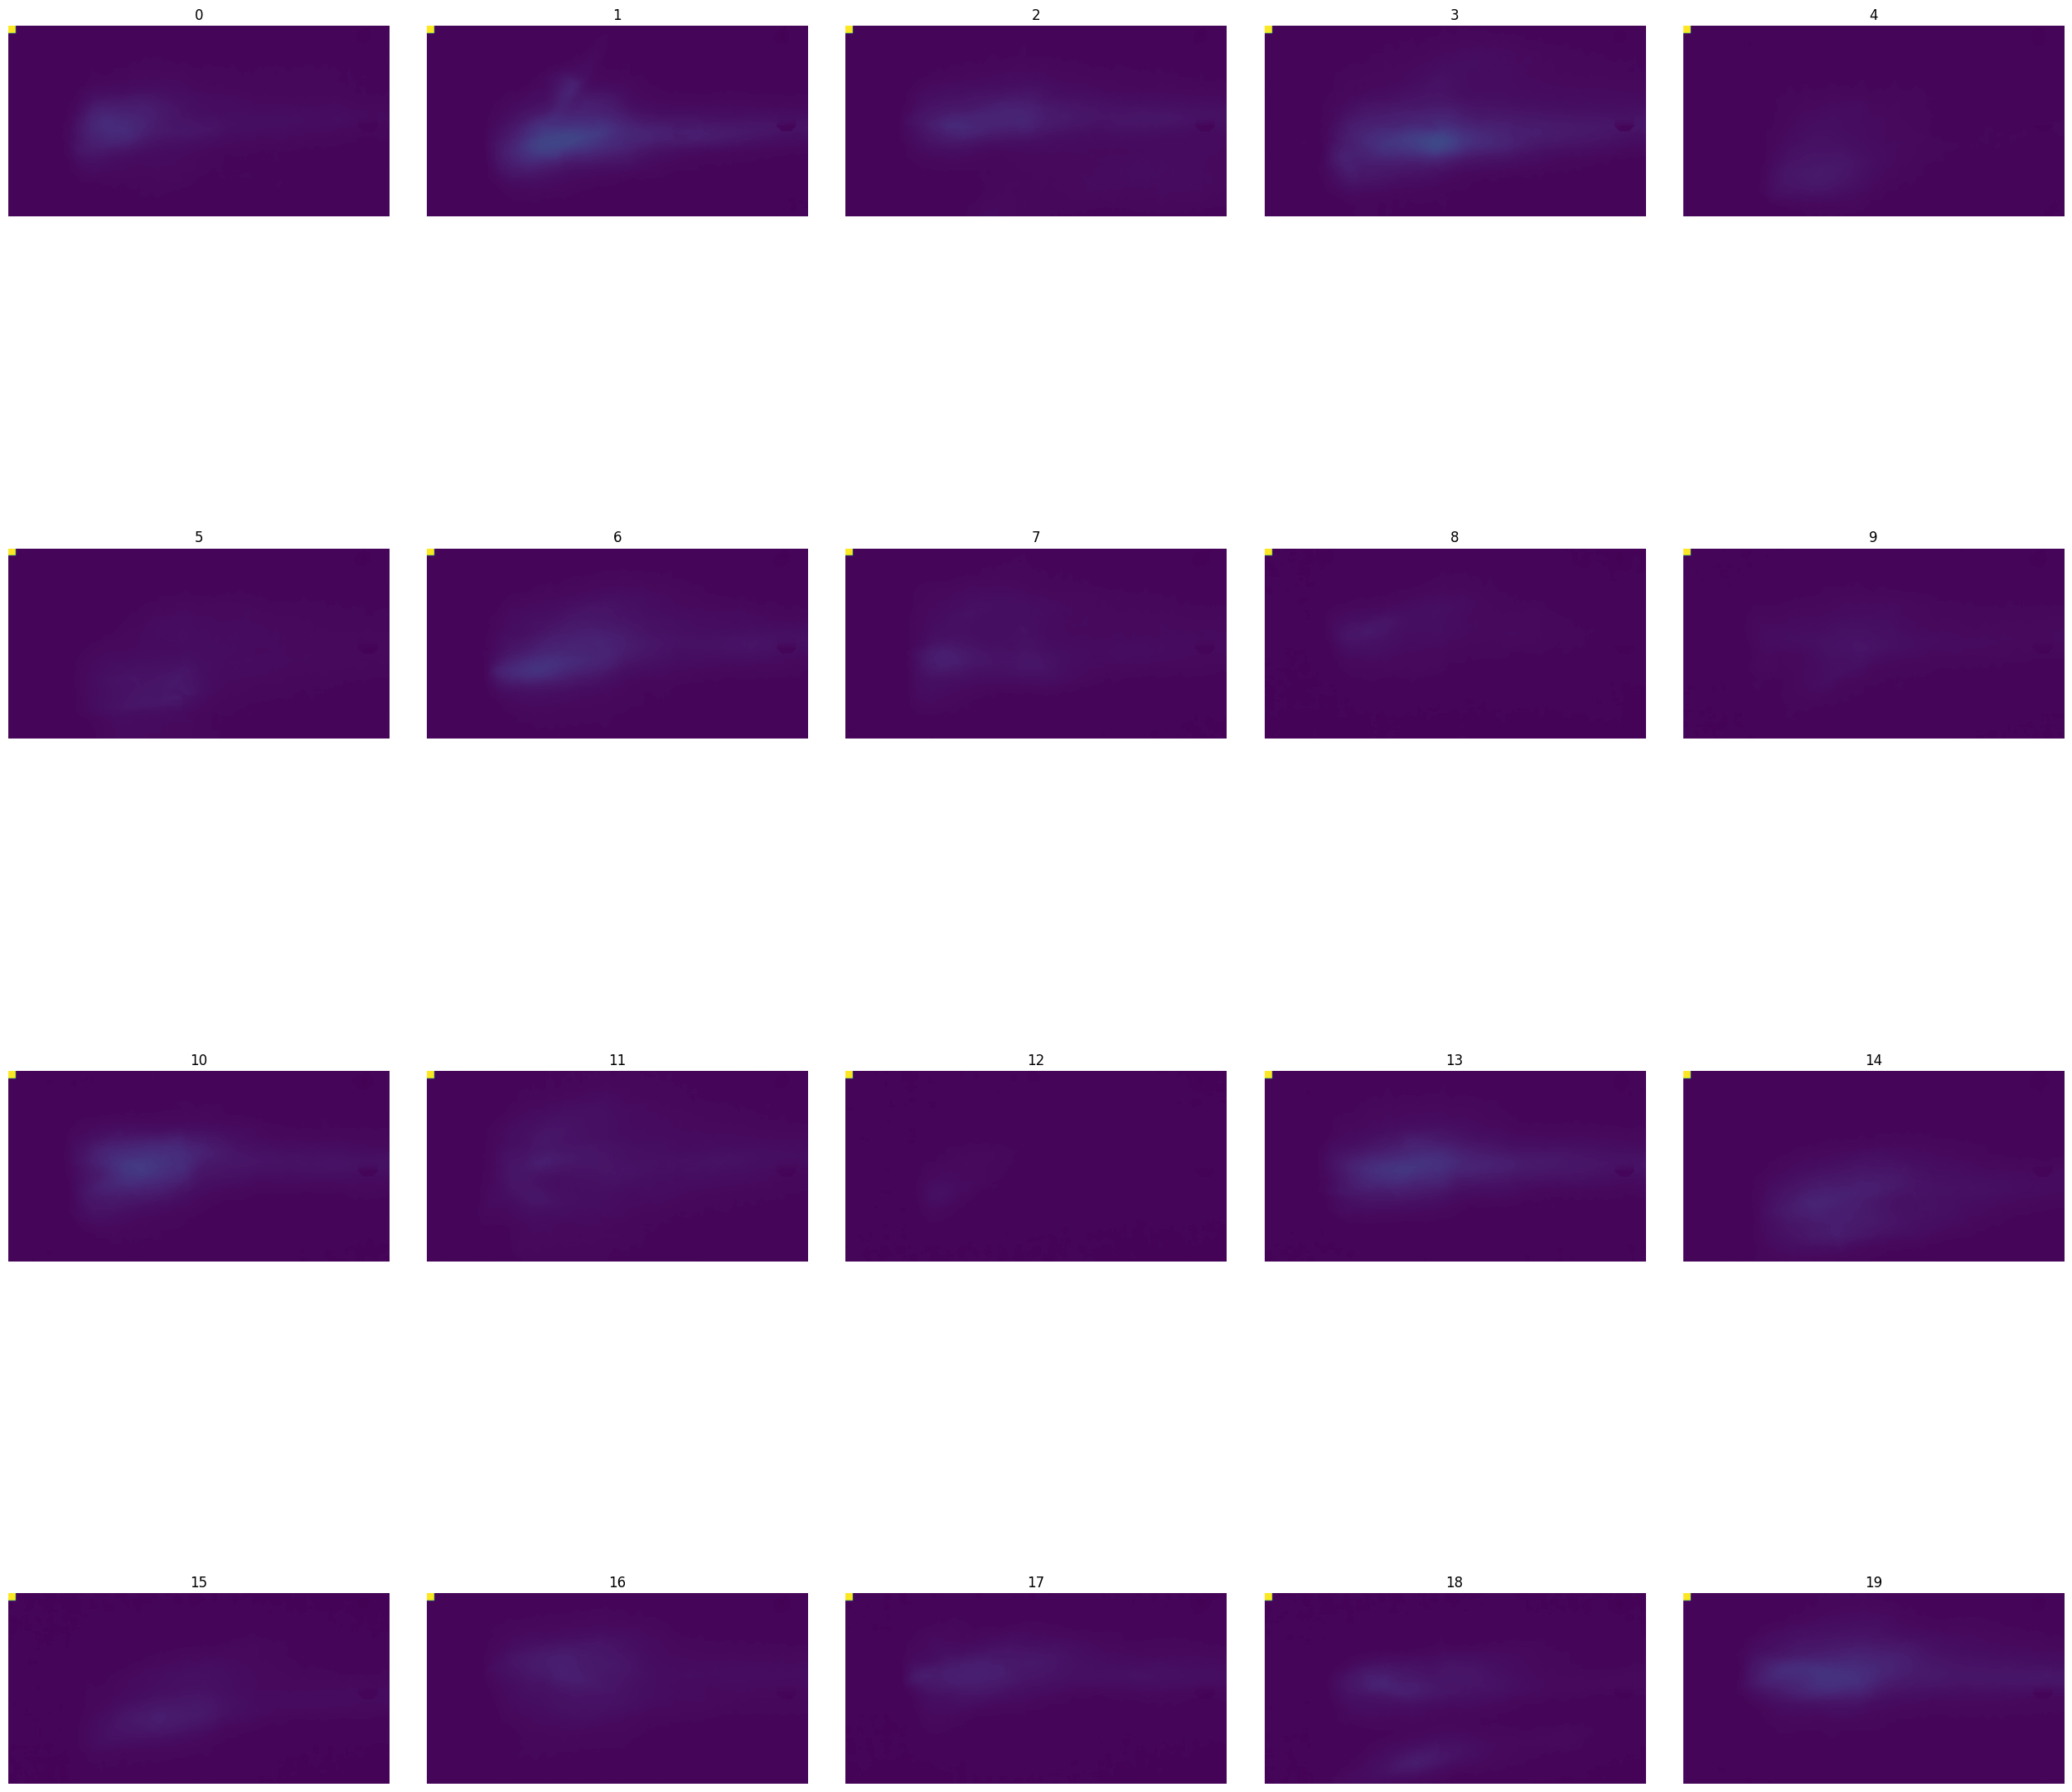

In [3]:
plot_images_from_dir("train/19", 20)